In [20]:
!pip install tensorflow


In [21]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      Traceback (most recent call last):
        File "/Users/krushna/Desktop/Programming/ML/ML-Project-4/ML-Project-4/mlp4/lib/python3.10/site-packages/setuptools/_vendor/packaging/requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
        File "/Users/krushna/Desktop/Programming/ML/ML-Project-4/ML-Project-4/mlp4/lib/python3.10/site-packages/setuptools/_vendor/packaging/_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "/Users/krushna/Desktop/Programming/ML/ML-Project-4/ML-Project-4/mlp4/lib/python3.10/site-packages/setuptools/_vendor/packaging/_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse

In [22]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [23]:
## import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("/Users/krushna/Desktop/Programming/ML/ML-Project-4/ML-Project-4/Churn_Modelling.csv")

## ANN Implementation

In [25]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
## Divide the dataset into dependent and independdent features 
x = df.iloc[:, 3:13]
y = df.iloc[:, 13]

In [27]:
##Feature Engineering 
geography = pd.get_dummies(x['Geography'],drop_first = True).astype(int)
gender = pd.get_dummies(x['Gender'],drop_first = True).astype(int)

In [28]:
# Concatinate these variables with dataframe 
x = x.drop(['Geography' , 'Gender'], axis = 1)
x = pd.concat([x, geography, gender], axis = 1)

In [29]:
# Splitting the datset into test and train 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x ,y,test_size = 0.2, random_state=0)

In [30]:
##Feature Scalling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [31]:
x_test.shape

(2000, 11)

In [32]:
#Lets create Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout 

In [33]:
#Lets initialie ANN
classifier = Sequential()

In [34]:
#Add Input Layer 
classifier.add(Dense(units = 11 , activation = 'relu'))

In [35]:
#Add 1st Hidden Layer 
classifier.add(Dense(units = 7 , activation = 'relu'))
classifier.add(Dropout(0.2))

In [36]:
#Add 2st Hidden Layer 
classifier.add(Dense(units = 6 , activation = 'relu'))
classifier.add(Dropout(0.3))

In [37]:
# Add Ouput Layer 
classifier.add(Dense(1 , activation = 'sigmoid')) 

In [40]:
# Train NeuralNetwork
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics=['accuracy'])

In [41]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [42]:
model_history = classifier.fit(x_train, y_train , validation_split = 0.33, batch_size = 10, epochs = 50)

Epoch 1/50
536/536 [==============================] - 1s 743us/step - loss: 0.4806 - accuracy: 0.7959 - val_loss: 0.4176 - val_accuracy: 0.8088
Epoch 2/50
536/536 [==============================] - 0s 600us/step - loss: 0.4065 - accuracy: 0.8203 - val_loss: 0.3863 - val_accuracy: 0.8440
Epoch 3/50
536/536 [==============================] - 0s 595us/step - loss: 0.3929 - accuracy: 0.8343 - val_loss: 0.3718 - val_accuracy: 0.8455
Epoch 4/50
536/536 [==============================] - 0s 589us/step - loss: 0.3851 - accuracy: 0.8354 - val_loss: 0.3750 - val_accuracy: 0.8395
Epoch 5/50
536/536 [==============================] - 0s 592us/step - loss: 0.3904 - accuracy: 0.8349 - val_loss: 0.3812 - val_accuracy: 0.8432
Epoch 6/50
536/536 [==============================] - 0s 617us/step - loss: 0.3895 - accuracy: 0.8391 - val_loss: 0.3668 - val_accuracy: 0.8489
Epoch 7/50
536/536 [==============================] - 0s 631us/step - loss: 0.3806 - accuracy: 0.8451 - val_loss: 0.3681 - val_accuracy:

In [43]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [44]:
#Early Stopping 
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.003,
    patience=0,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [45]:
model_history = classifier.fit(x_train, y_train , validation_split = 0.33, batch_size = 10, epochs = 1000, callbacks = early_stopping)

Epoch 1/1000
536/536 [==============================] - 0s 629us/step - loss: 0.3569 - accuracy: 0.8492 - val_loss: 0.3637 - val_accuracy: 0.8504
Epoch 2/1000
536/536 [==============================] - 0s 593us/step - loss: 0.3550 - accuracy: 0.8481 - val_loss: 0.3821 - val_accuracy: 0.8444
Epoch 2: early stopping


<function matplotlib.pyplot.show(close=None, block=None)>

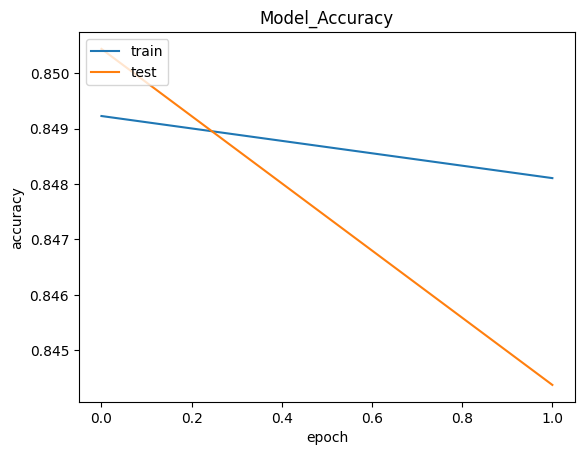

In [46]:
# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model_Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train' , 'test'] , loc = 'upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

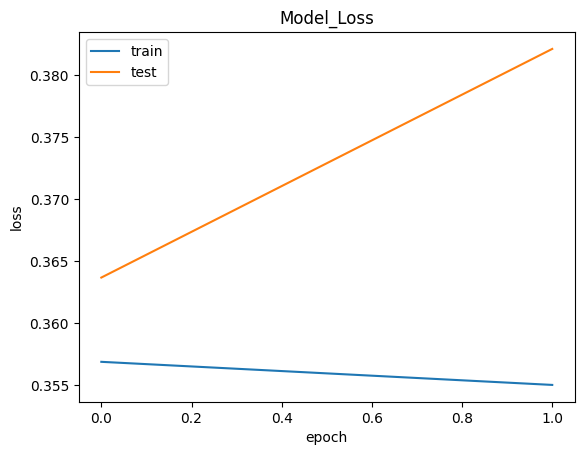

In [47]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model_Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train' , 'test'] , loc = 'upper left')
plt.show

In [48]:
# Making the Prediction and evaluation for the model
# Predicting Test Set Result 
y_pred = classifier.predict(x_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 380us/step


In [49]:
# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1567,   28],
       [ 231,  174]])

In [50]:
print("Shape of y_pred:", y_pred.shape)
print("Shape of y_train:", y_train.shape)

Shape of y_pred: (2000, 1)
Shape of y_train: (8000,)


In [51]:
y_pred = y_pred.ravel()
y_train = y_train.ravel()
y_train

array([0, 0, 0, ..., 0, 0, 1])

In [52]:
print("Data type of y_pred:", y_pred.dtype)
print("Data type of y_train:", y_train.dtype)


Data type of y_pred: bool
Data type of y_train: int64


In [53]:
#get the weight 
classifier.get_weights()

[array([[-2.82797247e-01,  1.36309475e-01,  1.02644098e+00,
          6.02547526e-01,  5.21562219e-01,  1.00872688e-01,
         -2.30139494e-03, -2.93882817e-01,  1.61798149e-01,
         -2.11311206e-01,  6.53079674e-02],
        [-2.20284089e-01,  1.32256675e+00, -1.78906775e+00,
         -2.14044833e+00, -2.27149415e+00, -1.05324578e+00,
          4.54088807e-01,  2.85542989e+00, -3.33268070e+00,
          2.62324548e+00,  6.53164685e-01],
        [ 5.88979900e-01, -4.25438762e-01,  8.78289044e-01,
         -4.77053337e-02, -1.48165986e-01,  1.61722469e+00,
          8.47510874e-01,  2.96516716e-01,  2.23160639e-01,
          2.04458430e-01,  3.06192428e-01],
        [ 1.84664679e+00,  2.08505344e+00, -3.22788978e+00,
         -1.36994684e+00, -2.78103411e-01, -6.54713511e-01,
          1.62659734e-01, -2.66479522e-01,  2.83405155e-01,
         -1.29906714e-01, -3.20102596e+00],
        [-5.09006381e-01,  1.71203983e+00,  3.67799163e-01,
         -1.42801690e+00, -4.44671154e-01,  

In [54]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.8705